In [1]:
import pandas as pd
import numpy as np


In [3]:
import os

folder_path = r"C:\E_Waste_Project\archive\underwater_plastics"

# List all files in the folder
os.listdir(folder_path)


['data.yaml', 'test', 'train', 'valid']

In [4]:
import yaml

yaml_path = r"C:\E_Waste_Project\archive\underwater_plastics\data.yaml"

with open(yaml_path) as f:
    data_config = yaml.safe_load(f)

data_config


{'train': 'C:/Users/Lathika/OneDrive/Desktop/E_Waste_Project/archive/underwater_plastics/train/images',
 'val': 'C:/Users/Lathika/OneDrive/Desktop/E_Waste_Project/archive/underwater_plastics/valid/images',
 'test': 'C:/Users/Lathika/OneDrive/Desktop/E_Waste_Project/archive/underwater_plastics/test/images',
 'nc': 15,
 'names': ['Mask',
  'can',
  'cellphone',
  'electronics',
  'gbottle',
  'glove',
  'metal',
  'misc',
  'net',
  'pbag',
  'pbottle',
  'plastic',
  'rod',
  'sunglasses',
  'tire'],
 'roboflow': {'workspace': 'object-detect-dmjpt',
  'project': 'ocean_waste',
  'version': 1,
  'license': 'CC BY 4.0',
  'url': 'https://universe.roboflow.com/object-detect-dmjpt/ocean_waste/dataset/1'}}

In [5]:
train_path = r"C:\E_Waste_Project\archive\underwater_plastics\train"
test_path = r"C:\E_Waste_Project\archive\underwater_plastics\test"
valid_path = r"C:\E_Waste_Project\archive\underwater_plastics\valid"

print("Train images:", len(os.listdir(train_path)))
print("Test images:", len(os.listdir(test_path)))
print("Valid images:", len(os.listdir(valid_path)))


Train images: 2
Test images: 2
Valid images: 2


In [8]:
# Step 1: Import libraries
import os
import cv2
from matplotlib import pyplot as plt

# Step 2: Set paths
train_path = 'C:/Users/Lathika/OneDrive/Desktop/E_Waste_Project/archive/underwater_plastics/train/images/image'
valid_path = 'C:/Users/Lathika/OneDrive/Desktop/E_Waste_Project/archive/underwater_plastics/valid/images/image'
test_path  = 'C:/Users/Lathika/OneDrive/Desktop/E_Waste_Project/archive/underwater_plastics/test/images'

# Step 3: Count images
print("Number of train images:", len(os.listdir(train_path)))
print("Number of validation images:", len(os.listdir(valid_path)))
print("Number of test images:", len(os.listdir(test_path)))

# Step 4: Display first 3 sample images from train
sample_images = os.listdir(train_path)[:3]
for img_file in sample_images:
    img = cv2.imread(os.path.join(train_path, img_file))
    if img is not None:  # check image is loaded
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert to RGB
        plt.imshow(img)
        plt.title(img_file)
        plt.axis('off')
        plt.show()
    else:
        print(f"Failed to load image: {img_file}")

# Step 5: Check for empty images
empty_images = [f for f in os.listdir(train_path) if os.path.getsize(os.path.join(train_path, f)) == 0]
if empty_images:
    print("Empty images found:", empty_images)
else:
    print("No empty images in train folder.")

# Step 6: Display image shapes for first 5 images
print("\nShapes of first 5 train images:")
for i, img_file in enumerate(os.listdir(train_path)[:5]):
    img = cv2.imread(os.path.join(train_path, img_file))
    if img is not None:
        print(f"{img_file} shape:", img.shape)



FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/Users/Lathika/OneDrive/Desktop/E_Waste_Project/archive/underwater_plastics/train/images/image'

In [9]:
# List all folders in train/images
train_images_folder = 'C:/Users/Lathika/OneDrive/Desktop/E_Waste_Project/archive/underwater_plastics/train/images'
print("Folders inside train/images:", os.listdir(train_images_folder))


Folders inside train/images: ['1-1_jpg.rf.3c35c15f5361d33821647bfd181b0af7.jpg', '1-1_jpg.rf.e2d17c52ecd26b5d05a7f48330f8b61c.jpg', '11007105319_jpg.rf.b2a05a1df81190cd1ad5a25816197884.jpg', '14_JPG_jpg.rf.286aab797f91ffe0a0852ffe1b5c27f7.jpg', '15a6-kirmaiu900053011_jpg.rf.694b77caa6986ae1304e755bbb96f798.jpg', '15a6-kirmaiu900053011_jpg.rf.e73a1d4a65a353b2eb07abc5f085b3ae.jpg', '15a6-kirmaiu900053022_jpg.rf.03ce2f8e15f7c1d49d9551d5695765c5.jpg', '15a6-kirmaiu900053022_jpg.rf.a4e3dff08e842a23e3a654dd8d897fc4.jpg', '15a6-kirmaiu9000530_jpg.rf.692cd7b5689470c34539f60305657bae.jpg', '15a6-kirmaiu9000530_jpg.rf.b6fb41639b7812586da5980077070880.jpg', '1601024846172-gettyimages-1--227745665_jpeg_jpg.rf.071d17b6027857f01352aac7df0e6401.jpg', '1601024846172-gettyimages-1--227745665_jpeg_jpg.rf.b946a9af82acb0915c1ee738be54a6f5.jpg', '1601024846172-gettyimages-1--227745665_jpeg_jpg.rf.d6a5dfa16f4c36bef7558655e863dcb0.jpg', '1601024846172-gettyimages-1227745665_jpeg_jpg.rf.6419c4d415554551b12699

In [10]:
img_exts = (".jpg", ".jpeg", ".png")
records = []

for fname in os.listdir(train_images_folder):
    if fname.lower().endswith(img_exts):
        records.append({"filename": fname, "class": "plastic"})  # all images labeled as plastic

df = pd.DataFrame(records)
print("Total images found:", len(df))
df.head()


Total images found: 3628


,filename,class
0,1-1_jpg.rf.3c35c15f5361d33821647bfd181b0af7.jpg,plastic
1,1-1_jpg.rf.e2d17c52ecd26b5d05a7f48330f8b61c.jpg,plastic
2,11007105319_jpg.rf.b2a05a1df81190cd1ad5a258161...,plastic
3,14_JPG_jpg.rf.286aab797f91ffe0a0852ffe1b5c27f7...,plastic
4,15a6-kirmaiu900053011_jpg.rf.694b77caa6986ae13...,plastic


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3628 entries, 0 to 3627
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  3628 non-null   object
 1   class     3628 non-null   object
dtypes: object(2)
memory usage: 56.8+ KB


In [12]:
df.describe(include="all").T


,count,unique,top,freq
filename,3628,3628,ynr_jpg.rf.b543fd60a3f74a1941ea2b0bdb3aca05.jpg,1
class,3628,1,plastic,3628


In [13]:
df.isnull().sum()


filename    0
class       0
dtype: int64

In [14]:
from PIL import Image
import matplotlib.pyplot as plt
import os

sample_path = os.path.join('data/train/images', df.iloc[0]['filename'])
img = Image.open(sample_path)
plt.imshow(img)
plt.axis('off')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'data/train/images\\1-1_jpg.rf.3c35c15f5361d33821647bfd181b0af7.jpg'

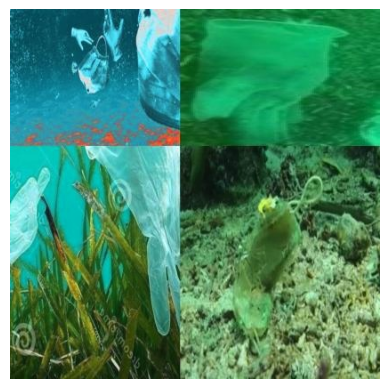

In [15]:
import matplotlib.pyplot as plt
from PIL import Image
import os

train_images_folder = 'C:/Users/Lathika/OneDrive/Desktop/E_Waste_Project/archive/underwater_plastics/train/images'
sample_path = os.path.join(train_images_folder, df.iloc[0]['filename'])

img = Image.open(sample_path)
plt.imshow(img)
plt.axis('off')
plt.show()
